# OVERVIEW OF MOTOR VEHICLE CRASHES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import openpyxl
import geopandas
from shapely import wkt

In [2]:
df = pd.read_excel('data/figure1.xls')
df.head()

,Year,Total Fatalities,Vehicle Miles Traveled (VMT) Millions,Fatality Rate per 100 Million VMT
0,1899,26,NaN,NaN
1,1900,36,NaN,NaN
2,1901,54,NaN,NaN
3,1902,79,NaN,NaN
4,1903,117,NaN,NaN


### OVERALL TRENDS

#### 1. Fatalities and Fatality Rate per 100 Million VMT, 1975-2019

Text(0, 0.5, 'Fatality Rate Per 100 Million VMT')

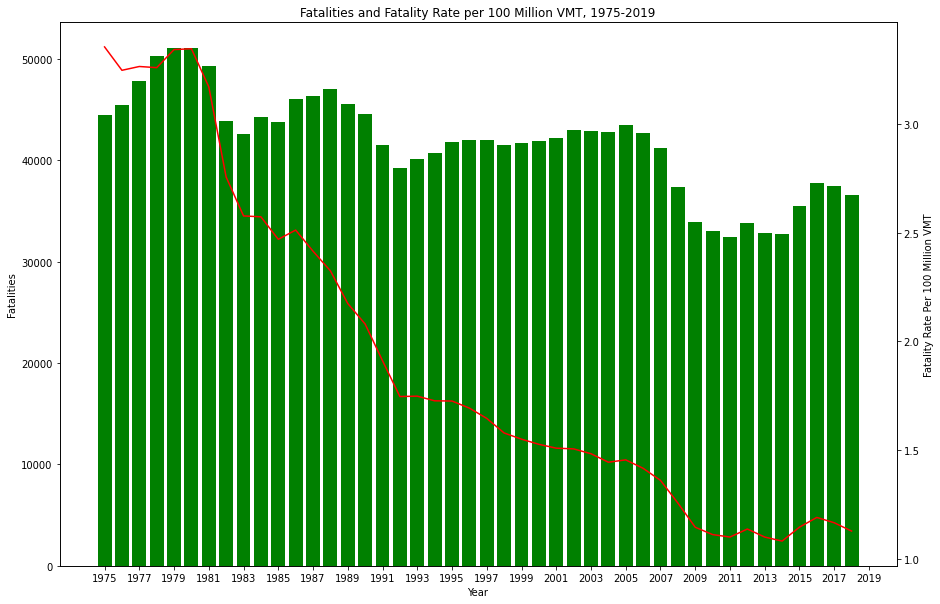

In [3]:
df_sliced = df[df['Year']>=1975]

x = []
for i in range(1975, 2020,2):
    x.append(i)
plt.figure(1, figsize=(15,10))
plt.title('Fatalities and Fatality Rate per 100 Million VMT, 1975-2019')
barchart = plt.bar(df_sliced['Year'],df_sliced['Total Fatalities'], color='green')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.twinx()
linechart = plt.plot(df_sliced['Year'], df_sliced['Fatality Rate per 100 Million VMT'], color='red')
plt.xticks(x)
plt.ylabel('Fatality Rate Per 100 Million VMT')

##### This graph shows two overlapping plots. The green barchart shows the count of the number of fatalities over the years. The red line chart shows the fatality rate per 100 Million VMT (Vehicle Miles Travlled) and how in the recent years after reaching a recent high of 37806 in 2016, the number and rate of fatalities have been decreasing

#### 2. People Injured and Injury Rate per 100 Million VMT, 1988-2019

In [4]:
injuries = pd.read_excel('data/injuries.xlsx' , header = 4)
injuries.head()

,Year,Injured,Resident Population,"Injury Rate per 100,000 Population",Licensed Drivers,"Injury Rate per 100,000 Licensed Drivers",Registered Motor Vehicles,"Injury Rate per 100,000 Registered Vehicles",Vehicle Miles Traveled (Millions),Injury Rate per 100 Million VMT
0,1988,3427000,244498982,1402,162854000,2105,177455476,1931,2025962,169
1,1989,3292000,246819230,1334,165554000,1989,181164568,1817,2096487,157
2,1990,3246000,249464396,1301,167015000,1944,184275422,1762,2144362,151
3,1991,3107000,252153092,1232,168995000,1839,186370190,1667,2172050,143
4,1992,3079000,255029699,1207,173125000,1779,184937848,1665,2247151,137


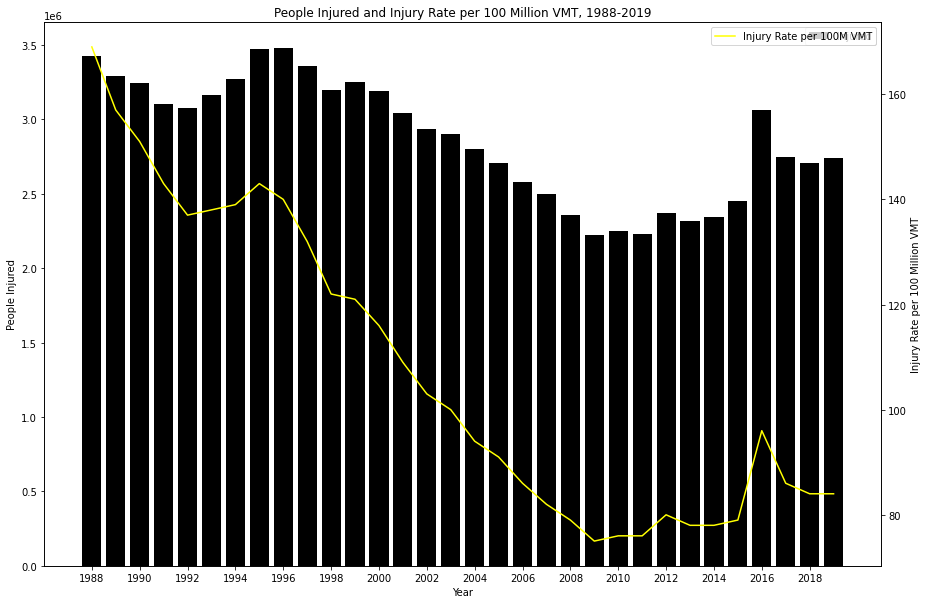

In [5]:
injuries["Year"] = pd.to_numeric(injuries["Year"])
x = []
for i in range(1988, 2020,2):
    x.append(i)
plt.figure(1, figsize=(15,10))
plt.title('People Injured and Injury Rate per 100 Million VMT, 1988-2019')
barchart = plt.bar(injuries['Year'], injuries['Injured'], color='black', label='Injured')
plt.legend()
plt.xlabel('Year')
plt.ylabel('People Injured')
plt.twinx()
linechart = plt.plot(injuries['Year'], injuries['Injury Rate per 100 Million VMT'], color='yellow', label='Injury Rate per 100M VMT')
plt.xticks(x)
plt.ylabel('Injury Rate per 100 Million VMT')
plt.legend()

##### This graph shows two overlapping plots. The black barchart shows the count of the number of people injured over the years. The yellow line chart shows the injury rate per 100 Million VMT (Vehicle Miles Travlled) and how in the recent years after reaching a recent peak of 3,240,000 in 2016, the number and rate of fatalities have been decreasing.

### People Killed and Injured, by Person Type

#### 3. Fatality Composition, by Person Type, 2010 and 2019

In [6]:
def values(xlfile):
    total_killed = {}
    for index, row in df.iterrows():
        if ((row['Vehicle Type'] != 'Total') and (row['Person Type'] == 'Subtotal')):   
            total_killed[row['Vehicle Type']] = row['Occupants Killed']
        elif ((row['Vehicle Type'] == 'Motorcyclists' or row['Vehicle Type'] == 'Nonoccupants') and (row['Person Type'] == 'Total')):   
            total_killed[row['Vehicle Type']] = row['Occupants Killed']  
        else:
            continue
    return total_killed

def plotpie(dict1, year):
    labels = []
    number = []
    percent = []
    plt.figure(1, figsize=(7,7))
    
    # Referred from
    # https://stackoverflow.com/questions/62593913/plotting-a-pie-chart-out-of-a-dictionary
    for x,y in dict1.items():
        labels.append(x)
        number.append(y)
    plt.pie(number, labels=labels, startangle=90, autopct = '%1.1f%%', 
            explode=(0.1, 0.1, 0.1, 0.1, 0.1), labeldistance=1.05)
    plt.axis('equal')
    plt.title(' Fatality Composition, by Person Type: {}'.format(year))
    plt.legend(labels, bbox_to_anchor=(1.7,0.8), loc = 'center right' )
    plt.show()

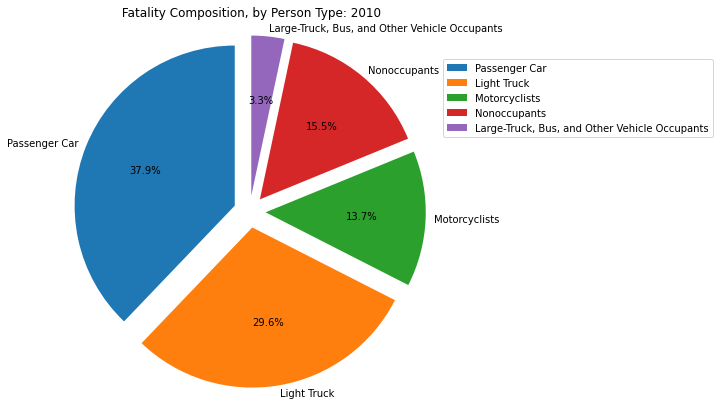

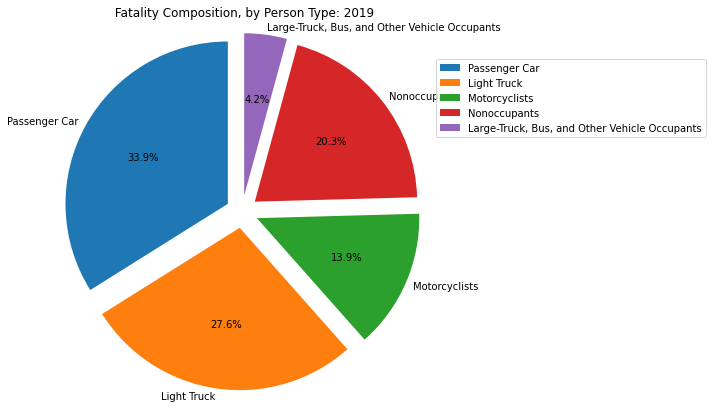

In [7]:
xlfile=["data/2010/TSF_Table_65.xlsx", "data/2019/TSF_Table_65.xlsx"]
xlfile1 = ["data/2010/TSF_Table_54.xlsx", "data/2019/TSF_Table_54.xlsx"]

for i in range(len(xlfile)):
    df = pd.read_excel(xlfile[i],engine='openpyxl', header=4, usecols=['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'])
    df.fillna(method='ffill', inplace=True)
    df.columns=['Vehicle Type', 'Person Type', 'Occupants Killed']
    for j in range(len(xlfile1)):
        if i==j:
            df1 = pd.read_excel(xlfile1[j],engine='openpyxl', header=3, usecols=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])
            df1.fillna(method='ffill', inplace=True)
            df1.columns=['Vehicle Type', 'Person Type', 'Occupants Killed']
            df = pd.concat([df,df1], axis=0)
            total_killed = values(df)
            total_killed['Large-Truck, Bus, and Other Vehicle Occupants'] = total_killed['Large Truck']+total_killed['Bus']+ total_killed['Other/Unknown\nVehicle']
            del total_killed['Large Truck'], total_killed['Bus'],total_killed['Other/Unknown\nVehicle']
            year=xlfile[i][5:9]
            plotpie(total_killed, year)

##### Non occupants include Pedestrians, Pedalcyclistes, and other non occupants. The above pie chart shows the fatalities occured depending on the person type, (such as car occupants, large -truck, bus occupants, pedalcyclists etc) from 2010 and 2019. Assuming same comparison between 2010 and 2019, the biggest change is seen in the percentage of non occupant fatalities from 15% to 20%;and there is a small decrease in the passenger car and light truck occupant fatalities. 

#### 4. Proportion of Fatalities Inside/Outside Vehicle, 1975-2019

In [8]:
fig4 = pd.read_excel("data/figure4.xlsx" , header = 4)
fig4.head()

,Injury Severity,Year,Passenger Cars,Light Trucks,Large Trucks,Buses,Other/Unknown,Occupants Total,Motorcycles,Pedestrians,Pedalcyclists,Other/Unknown Nonoccupants,nonoccupants Total,Total
0,Killed,1975,25929,4856,961,53,937,32736,3189,7516,1003,81,8600,44525
1,Killed,1976,26166,5438,1132,73,981,33790,3312,7427,914,80,8421,45523
2,Killed,1977,26782,5976,1287,42,959,35046,4104,7732,922,74,8728,47878
3,Killed,1978,28153,6745,1395,41,622,36956,4577,7795,892,111,8798,50331
4,Killed,1979,27808,7178,1432,39,579,37036,4894,8096,932,135,9163,51093


In [9]:
fig4_killed = fig4.loc[fig4["Injury Severity"] == "Killed"].copy()
fig4_killed["Inside Vehicle"] = fig4_killed["Occupants Total"]/fig4_killed["Total"]*100
fig4_killed["Outside Vehicle"] = 100 - fig4_killed["Inside Vehicle"]
fig4_sliced = fig4_killed[["Year", "Occupants Total", "nonoccupants Total", "Total", "Inside Vehicle", "Outside Vehicle"]]
fig4_sliced.head()

,Year,Occupants Total,nonoccupants Total,Total,Inside Vehicle,Outside Vehicle
0,1975,32736,8600,44525,73.522740,26.477260
1,1976,33790,8421,45523,74.226215,25.773785
2,1977,35046,8728,47878,73.198546,26.801454
3,1978,36956,8798,50331,73.425920,26.574080
4,1979,37036,9163,51093,72.487425,27.512575


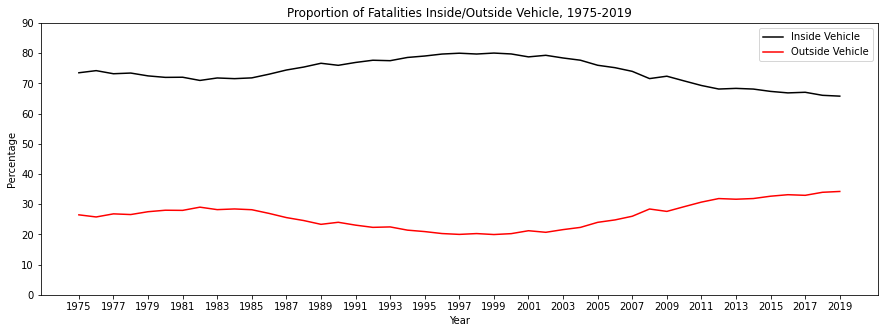

In [10]:
x = []
y = []
for i in range(0,100,10):
    y.append(i)
for i in range(1975, 2020,2):
    x.append(i)
plt.figure(1, figsize=(15,5))
plt.title('Proportion of Fatalities Inside/Outside Vehicle, 1975-2019')
linechart1 = plt.plot(fig4_sliced['Year'], fig4_sliced['Inside Vehicle'], color='black', label='Inside Vehicle')
plt.xlabel('Year')
plt.ylabel('Percentage')
linechart2 = plt.plot(fig4_sliced['Year'], fig4_sliced['Outside Vehicle'], color='red', label='Outside Vehicle')
plt.xticks(x)
plt.yticks(y)
plt.legend()

##### The above black line chart shows that the percentage of people killed '"inside" the vehicle (occupants of the vehicle) has decreased from the recent peak in 1966 at about 80% to 66% in 2019.
##### The red line chart shows the percentage of people killed "outside" the vehicle (motorcyclists, pedestrians, pedalcyclists, other non occupants). The percentage has increased from 20% in 1966 to about 35% in 2019.

#### 5. Fatalities by Land Use 1975 - 2019

In [11]:
fig5 = pd.read_excel("data/figure5.xlsx")
fig5.head()

,Year,Urban Deaths,UD_Perct,Rural Deaths,RD_Perct,Total Deaths
0,1977,19296,40,28463,60,47878
1,1978,19863,40,30018,60,50331
2,1979,21507,42,29135,58,51093
3,1980,21560,43,29114,57,51091
4,1981,20782,43,27692,57,49301


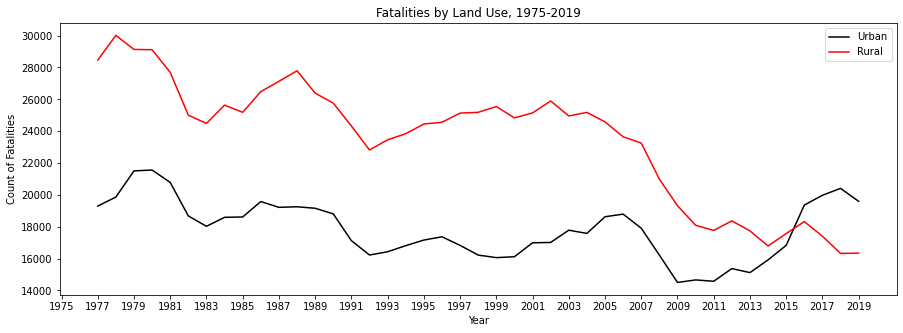

In [12]:
plt.figure(1, figsize=(15,5))
plt.title('Fatalities by Land Use, 1975-2019')
linechart1 = plt.plot(fig5['Year'], fig5['Urban Deaths'], color='black', label='Urban')
plt.xlabel('Year')
plt.ylabel('Count of Fatalities')
# plt.twinx()
linechart2 = plt.plot(fig5['Year'], fig5['Rural Deaths'], color='red', label='Rural')
plt.xticks(x)
plt.legend()
# plt.yticks(y)

##### The above graph shows that the number of fatalities have usually been greater for the rural area until 2016, where the number of fatalities in urban area were greater than the rural area.
##### In the past year, there has been a slight decrease in the number of urban fatalities (~4%) and slight increase (~0.1%) in rural fatalities. Overall, the count of urban fatalities is still greater than the rural fatalities.

### 2019 Traffic Fatalities and Percentage Changes based on User input for year, by State

In [13]:
dataframes_dict = {}
for i in range(2010, 2020):
    file = 'data/'+ str(i) + "/CRASH.csv"
    file1 = pd.read_csv(file)
    file1 = file1.drop([0,1,2,3,59,58,57,56,55])
    file1 = file1.rename(columns = {"Table 106": "States", "Unnamed: 1": "fatalities{}" .format(i-1) , 
                            "Unnamed: 2": "fatalities{}".format(i) ,
                        "Unnamed: 3": "% Change"})
    dataframes_dict[i] = file1
print(dataframes_dict[2019].head())

       States fatalities2018 fatalities2019 % Change
4     Alabama            953            930       -2
5      Alaska             80             67      -16
6     Arizona          1,011            981       -3
7    Arkansas            520            505       -3
8  California          3,798          3,606       -5


In [14]:
year = int(input("Enter the year:\n"))

Enter the year:
2015


In [15]:
df2 = dataframes_dict[year]
df2.rename(columns = {'States': 'NAME'}, inplace =  True)
df2.head()

,NAME,fatalities2014,fatalities2015,% Change
4,Alabama,820,850,4
5,Alaska,73,65,-11
6,Arizona,773,897,16
7,Arkansas,470,550,17
8,California,"3,102","3,387",9


In [16]:
states_shp = geopandas.read_file('data/geopandas/usa-states-census-2014.shp')
states_shp = states_shp.merge(df2, on = "NAME")
states_shp['fatalities{}'.format(year)] = states_shp['fatalities{}'.format(year)].str.replace(',', '').astype(int)
states_shp.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry,fatalities2014,fatalities2015,% Change
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...","3,102",3387,9
1,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...","2,494",2938,18
2,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...","1,164",1432,23
3,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117....",186,216,16
4,17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458,Midwest,"POLYGON Z ((-91.50617 40.20064 0.00000, -91.49...",924,998,8


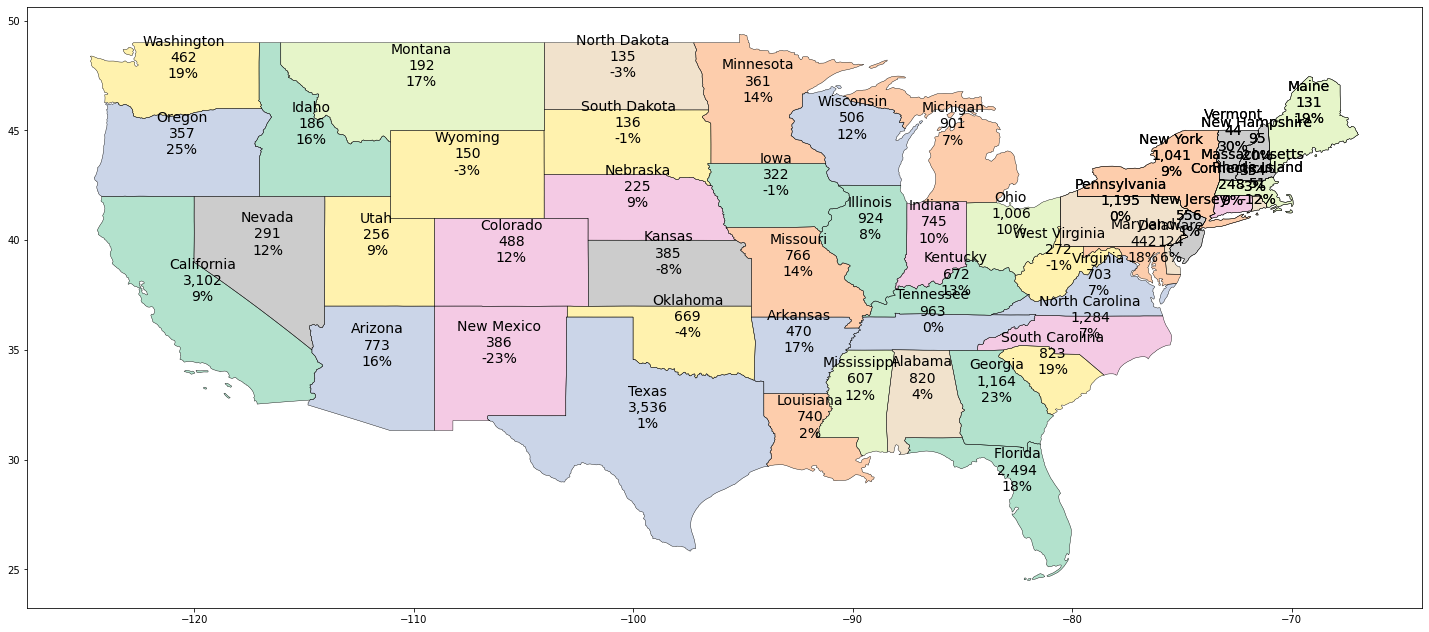

In [17]:
import math
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
states_shp.apply(lambda x: ax.annotate(
    s=x.NAME + "\n" + str(x["fatalities{}".format(year-1)]) + "\n" + str(x["% Change"]) + "%", 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=14
),axis=1);
states_shp.boundary.plot(ax=ax, color='Black', linewidth=.4)
states_shp.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))

(-127.6146362, -64.06109779999998, 23.253819649999997, 50.62866934999999)

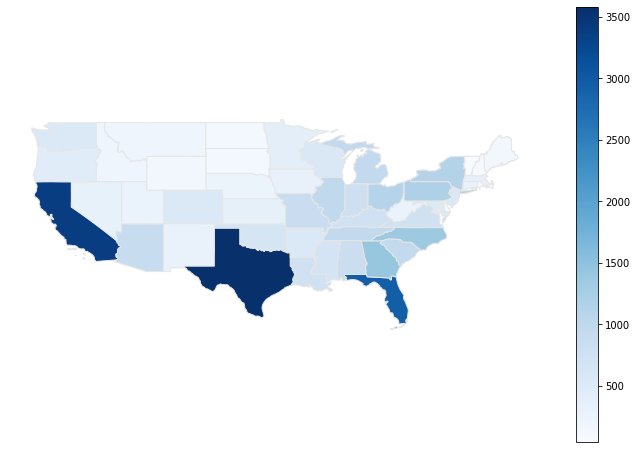

In [18]:
fig, ax = plt.subplots(1, figsize=(12,8))
states_shp.plot(column='fatalities{}'.format(year), cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')

In [19]:
restraint_use = pd.read_excel("data/restrain_type.xlsx", header = 4)

In [20]:
restraint_use.head()

,Crash Severity,Year,Restrained Number,Restrained Percent,Unrestrained Number,Unrestrained Percent,Unknown Number,Unknown Percent,Total Number,Percent
0,Fatal,1975,2580,5.6,29713,64.3,13931,30.1,46224,100
1,Fatal,1976,2059,4.5,29908,64.7,14239,30.8,46206,100
2,Fatal,1977,1895,3.9,33013,67.3,14154,28.8,49062,100
3,Fatal,1978,1878,3.6,37610,72.3,12510,24.1,51998,100
4,Fatal,1979,1680,3.2,38326,73.5,12123,23.3,52129,100


In [21]:
ru_fatal = restraint_use[restraint_use["Crash Severity"] == "Fatal"].copy()

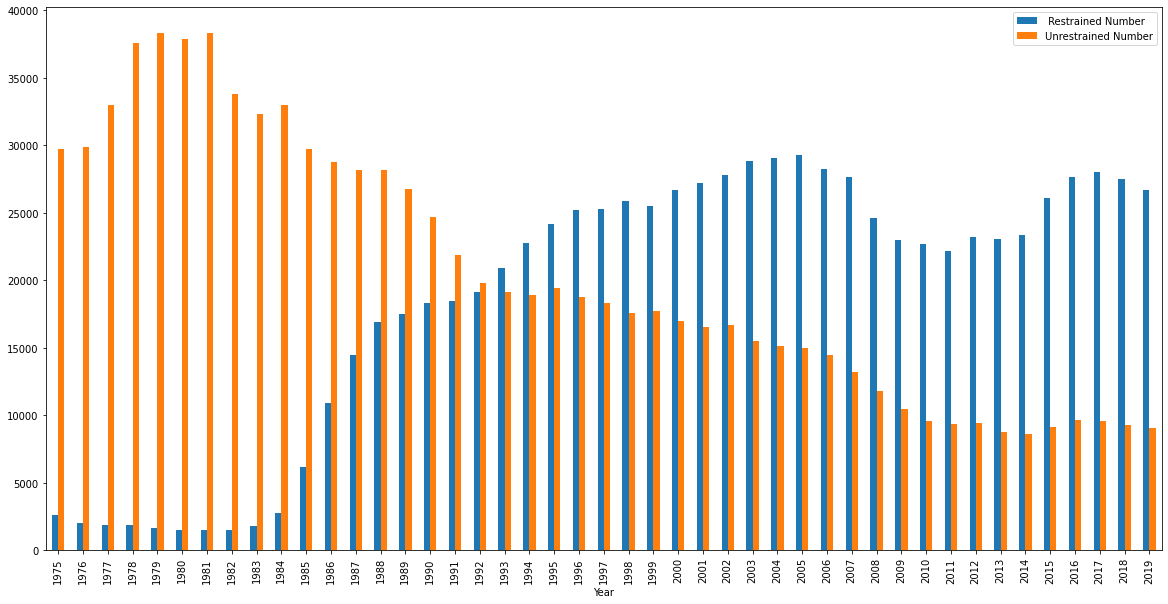

In [22]:
x = []
for i in range(1975, 2020,1):
    x.append(i)
X_axis = np.arange(len(ru_fatal))  
# plt.bar(X_axis - 0.2, ru_fatal["Restrained Number"], 0.4, label = 'Restrained')
# plt.bar(X_axis + 0.2, ru_fatal["Unrestrained Number"], 0.4, label = 'Unrestrained')
  
# plt.xticks(X_axis, x)
# plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
# plt.legend()
# plt.show()
# plt.figure(2, figsize=(10,10))
plt.rcParams['figure.figsize'] = [20, 10]
ru_fatal.plot(x="Year", y=[" Restrained Number", "Unrestrained Number"], kind="bar")
plt.show()
# plt.figure(1, figsize=(20,10))
# plt.xticks(x)